In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [2]:
churn = pd.read_csv('data/churn_train.csv')

In [3]:
churn.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0


In [10]:
churn['last_trip_date'] = pd.to_datetime(churn['last_trip_date'])

In [12]:
churn['signup_date'] = pd.to_datetime(churn['signup_date'])

In [14]:
churn['signup_date']

0       2014-01-12
1       2014-01-25
2       2014-01-02
3       2014-01-09
4       2014-01-31
           ...    
39995   2014-01-26
39996   2014-01-08
39997   2014-01-04
39998   2014-01-08
39999   2014-01-18
Name: signup_date, Length: 40000, dtype: datetime64[ns]

In [15]:
churn.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct'],
      dtype='object')

In [17]:
churn['phone'].isnull().sum()

319

In [20]:
churn['phone'].fillna('Other', inplace = True)

In [26]:
churn[['avg_rating_by_driver', 'avg_rating_of_driver']].isnull().sum()

avg_rating_by_driver     162
avg_rating_of_driver    6528
dtype: int64

In [32]:
drop_labels = churn[(churn['avg_rating_by_driver'].isnull()) & (churn['avg_rating_of_driver'].isnull())].index

In [34]:
churn = churn.drop(index=drop_labels, axis=1)

In [38]:
churn.last_trip_date

0       2014-05-03
1       2014-01-26
2       2014-05-21
3       2014-01-10
4       2014-05-13
           ...    
39995   2014-04-02
39996   2014-05-09
39997   2014-06-24
39998   2014-02-09
39999   2014-06-27
Name: last_trip_date, Length: 39943, dtype: datetime64[ns]

In [42]:
churn['retention'] = churn['last_trip_date'] >= '2014-06-01' 

In [46]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39943 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   avg_dist                39943 non-null  float64       
 1   avg_rating_by_driver    39838 non-null  float64       
 2   avg_rating_of_driver    33472 non-null  float64       
 3   avg_surge               39943 non-null  float64       
 4   city                    39943 non-null  object        
 5   last_trip_date          39943 non-null  datetime64[ns]
 6   phone                   39943 non-null  object        
 7   signup_date             39943 non-null  datetime64[ns]
 8   surge_pct               39943 non-null  float64       
 9   trips_in_first_30_days  39943 non-null  int64         
 10  luxury_car_user         39943 non-null  bool          
 11  weekday_pct             39943 non-null  float64       
 12  retention               39943 non-null  bool  

In [49]:
churn.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,39943.000000,39838.000000,33472.000000,39943.000000,39943.000000,39943.000000,39943.000000
mean,5.788158,4.777434,4.601697,1.074900,8.847450,2.283354,60.896160
std,5.656030,0.448088,0.614810,0.222341,19.979139,3.813300,37.063863
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.930000,5.000000,5.000000,1.050000,8.300000,3.000000,100.000000
max,129.890000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [52]:
churn['avg_rating_of_driver'].isnull().sum() / len(churn)

0.1620058583481461

In [54]:
churn[churn['avg_rating_of_driver'].isnull()]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,retention
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0,False
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0,False
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0,False
5,14.51,5.0,NaN,1.00,Astapor,2014-04-22,iPhone,2014-01-29,0.0,0,True,100.0,False
10,3.96,5.0,NaN,2.00,Winterfell,2014-01-19,iPhone,2014-01-18,100.0,1,False,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39966,8.60,5.0,NaN,1.00,Winterfell,2014-05-26,iPhone,2014-01-31,0.0,0,False,100.0,False
39971,13.45,5.0,NaN,1.00,King's Landing,2014-02-26,Android,2014-01-08,0.0,0,True,100.0,False
39975,1.16,5.0,NaN,1.00,Astapor,2014-01-18,iPhone,2014-01-18,0.0,1,True,0.0,False
39980,4.48,4.0,NaN,1.00,Astapor,2014-05-11,iPhone,2014-01-21,0.0,1,True,50.0,False


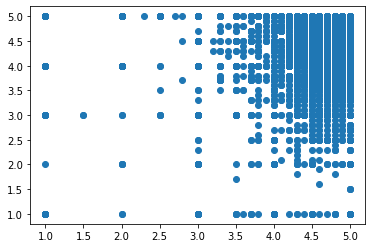

In [56]:
fig, ax = plt.subplots()
ax.scatter(churn['avg_rating_by_driver'], churn['avg_rating_of_driver'])

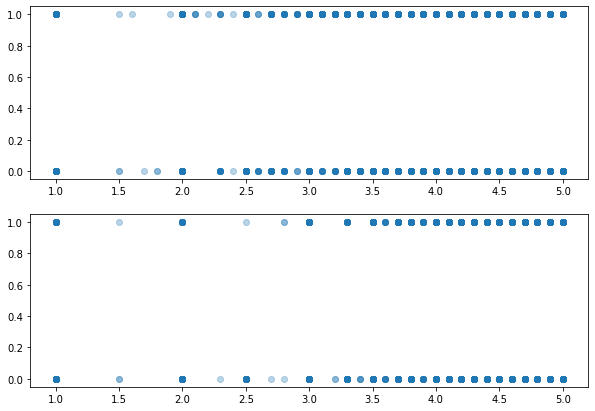

In [60]:
fig, axs = plt.subplots(2, figsize=(10, 7))
axs[0].scatter(churn['avg_rating_of_driver'], churn['retention'], alpha=.3)
axs[1].scatter(churn['avg_rating_by_driver'], churn['retention'], alpha=.3)

In [77]:
churn['avg_rating_of_driver'].std()

0.6148098931681093

In [78]:
churn['avg_rating_by_driver'].std()

0.44808817331777373

In [67]:
churn[(churn['avg_rating_by_driver'] > 4.0) & (churn['retention'] == True)]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,retention
12,5.42,4.7,5.0,1.00,Astapor,2014-06-28,iPhone,2014-01-05,0.0,2,True,33.3,True
14,4.28,5.0,4.0,1.15,Winterfell,2014-06-28,Android,2014-01-14,20.0,2,False,40.0,True
25,11.44,4.6,4.7,1.00,Astapor,2014-06-09,iPhone,2014-01-25,0.0,6,True,31.4,True
30,2.49,4.9,4.7,1.11,King's Landing,2014-06-28,Android,2014-01-09,14.3,2,True,78.6,True
31,1.45,4.8,3.6,1.20,Astapor,2014-06-14,iPhone,2014-01-25,28.6,2,True,57.1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39986,12.10,5.0,4.0,1.00,Astapor,2014-06-28,iPhone,2014-01-22,0.0,2,False,75.0,True
39991,3.01,5.0,5.0,1.00,Astapor,2014-06-21,iPhone,2014-01-01,0.0,0,False,0.0,True
39994,3.88,4.8,5.0,1.00,Astapor,2014-06-27,Android,2014-01-16,0.0,2,False,100.0,True
39997,3.04,5.0,5.0,1.00,Winterfell,2014-06-24,Android,2014-01-04,0.0,3,True,33.3,True


In [68]:
churn[(churn['avg_rating_of_driver'] > 4.0) & (churn['retention'] == True)]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,retention
12,5.42,4.7,5.0,1.00,Astapor,2014-06-28,iPhone,2014-01-05,0.0,2,True,33.3,True
25,11.44,4.6,4.7,1.00,Astapor,2014-06-09,iPhone,2014-01-25,0.0,6,True,31.4,True
30,2.49,4.9,4.7,1.11,King's Landing,2014-06-28,Android,2014-01-09,14.3,2,True,78.6,True
34,2.89,5.0,5.0,1.00,Astapor,2014-06-22,Android,2014-01-22,0.0,0,False,0.0,True
36,10.58,5.0,4.3,1.03,Astapor,2014-06-01,iPhone,2014-01-02,11.1,2,False,88.9,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39977,2.05,4.0,5.0,1.00,Astapor,2014-06-29,iPhone,2014-01-18,0.0,0,False,0.0,True
39991,3.01,5.0,5.0,1.00,Astapor,2014-06-21,iPhone,2014-01-01,0.0,0,False,0.0,True
39994,3.88,4.8,5.0,1.00,Astapor,2014-06-27,Android,2014-01-16,0.0,2,False,100.0,True
39997,3.04,5.0,5.0,1.00,Winterfell,2014-06-24,Android,2014-01-04,0.0,3,True,33.3,True


In [91]:
churn.T

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
avg_dist,6.94,8.06,21.5,9.46,13.77,14.51,4.87,1.78,6.87,2.41,...,9.45,3.01,2.71,6.89,3.88,2.06,2.05,3.04,3.49,4.25
avg_rating_by_driver,5.0,5.0,4.0,5.0,5.0,5.0,4.7,4.0,5.0,5.0,...,4.8,5.0,3.0,5.0,4.8,4.8,5.0,5.0,4.3,4.7
avg_rating_of_driver,5.0,5.0,4.601697,4.601697,4.601697,4.601697,4.0,5.0,4.7,3.0,...,5.0,5.0,3.0,5.0,5.0,4.3,5.0,5.0,3.3,5.0
avg_surge,1.0,1.0,1.0,2.75,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.25,1.0,1.0,1.08,1.0,1.0,1.5,1.0
city,Astapor,Astapor,Winterfell,Winterfell,Winterfell,Astapor,Astapor,Winterfell,Astapor,Winterfell,...,Winterfell,Astapor,King's Landing,Winterfell,Astapor,Winterfell,King's Landing,Winterfell,Astapor,Astapor
last_trip_date,2014-05-03 00:00:00,2014-01-26 00:00:00,2014-05-21 00:00:00,2014-01-10 00:00:00,2014-05-13 00:00:00,2014-04-22 00:00:00,2014-04-21 00:00:00,2014-01-12 00:00:00,2014-01-30 00:00:00,2014-01-29 00:00:00,...,2014-01-25 00:00:00,2014-06-21 00:00:00,2014-02-15 00:00:00,2014-01-04 00:00:00,2014-06-27 00:00:00,2014-04-02 00:00:00,2014-05-09 00:00:00,2014-06-24 00:00:00,2014-02-09 00:00:00,2014-06-27 00:00:00
phone,Android,Android,iPhone,Android,iPhone,iPhone,Android,iPhone,Android,iPhone,...,iPhone,iPhone,Android,Android,Android,Android,iPhone,Android,iPhone,iPhone
signup_date,2014-01-12 00:00:00,2014-01-25 00:00:00,2014-01-02 00:00:00,2014-01-09 00:00:00,2014-01-31 00:00:00,2014-01-29 00:00:00,2014-01-18 00:00:00,2014-01-11 00:00:00,2014-01-01 00:00:00,2014-01-28 00:00:00,...,2014-01-23 00:00:00,2014-01-01 00:00:00,2014-01-26 00:00:00,2014-01-03 00:00:00,2014-01-16 00:00:00,2014-01-26 00:00:00,2014-01-08 00:00:00,2014-01-04 00:00:00,2014-01-08 00:00:00,2014-01-18 00:00:00
surge_pct,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,100.0,0.0,0.0,9.5,0.0,0.0,40.0,0.0
trips_in_first_30_days,0,2,1,1,0,0,0,3,3,1,...,4,0,1,1,2,8,2,3,5,2


In [79]:
from scipy.stats import ttest_ind
a = churn[churn['avg_rating_by_driver'].isnull() == False].iloc[:33000, 1]
b = churn[churn['avg_rating_of_driver'].isnull() == False].iloc[:33000, 2]
ttest_ind(a, b, equal_var=False)

Ttest_indResult(statistic=41.81688745616153, pvalue=0.0)

In [80]:
churn[churn['avg_rating_by_driver'].isnull() == False].mean()

<ipython-input-80-b87a01921c29>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  churn[churn['avg_rating_by_driver'].isnull() == False].mean()


avg_dist                   5.789083
avg_rating_by_driver       4.777434
avg_rating_of_driver       4.601987
avg_surge                  1.074524
surge_pct                  8.823912
trips_in_first_30_days     2.287665
luxury_car_user            0.376977
weekday_pct               60.906052
retention                  0.376525
dtype: float64

In [83]:
churn['avg_rating_of_driver'].fillna(churn['avg_rating_of_driver'].mean(), inplace=True)
churn['avg_rating_by_driver'].fillna(churn['avg_rating_by_driver'].mean(), inplace=True)

In [89]:
churn.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,39943.000000,39943.000000,39943.000000,39943.000000,39943.000000,39943.000000,39943.000000
mean,5.788158,4.777434,4.601697,1.074900,8.847450,2.283354,60.896160
std,5.656030,0.447499,0.562808,0.222341,19.979139,3.813300,37.063863
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,66.700000
75%,6.930000,5.000000,5.000000,1.050000,8.300000,3.000000,100.000000
max,129.890000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [86]:
churn.corr()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,retention
avg_dist,1.000000,0.082187,0.030752,-0.079807,-0.102800,-0.136215,0.026608,0.097287,-0.094976
avg_rating_by_driver,0.082187,1.000000,0.097762,0.007786,0.018755,-0.039271,0.010289,0.021501,-0.027435
avg_rating_of_driver,0.030752,0.097762,1.000000,-0.027881,-0.008803,-0.013429,0.001616,0.011389,-0.011991
avg_surge,-0.079807,0.007786,-0.027881,1.000000,0.793497,-0.001680,-0.075575,-0.112789,-0.003346
surge_pct,-0.102800,0.018755,-0.008803,0.793497,1.000000,0.005059,-0.103726,-0.147626,0.011419
trips_in_first_30_days,-0.136215,-0.039271,-0.013429,-0.001680,0.005059,1.000000,0.114614,0.049522,0.210893
luxury_car_user,0.026608,0.010289,0.001616,-0.075575,-0.103726,0.114614,1.000000,0.033185,0.206845
weekday_pct,0.097287,0.021501,0.011389,-0.112789,-0.147626,0.049522,0.033185,1.000000,0.008472
retention,-0.094976,-0.027435,-0.011991,-0.003346,0.011419,0.210893,0.206845,0.008472,1.000000
